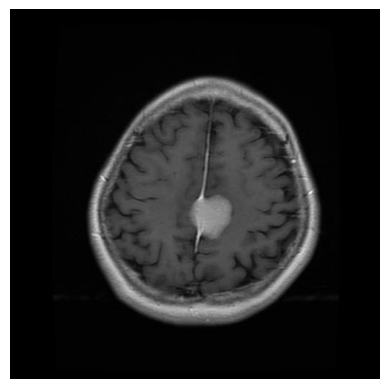

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io
import matplotlib.pyplot as plt
import cv2
image=io.imread(r"C:\Users\meteh\AppData\Local\Temp\a3c36a96-d721-4906-91f2-6029d082ba1e_Mr.zip.a1e\brain_tumor_data\test\337.jpg")
plt.imshow(image,cmap=plt.cm.gray)
plt.axis("off")
plt.show()
# MR görüntülerinin bulunduğu verisetinden belirli bir görüntüyü aldık

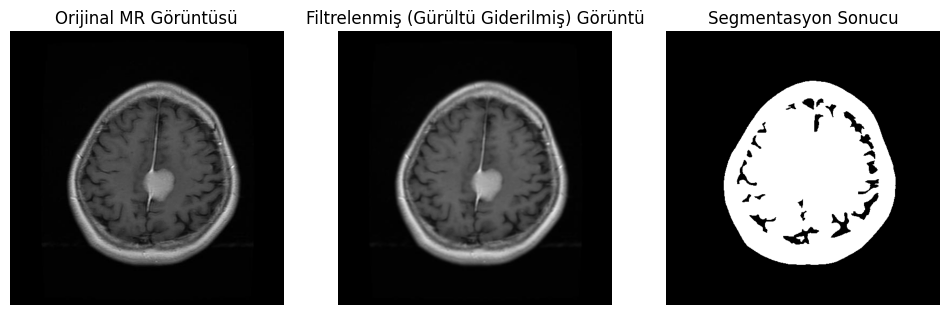

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,color,filters,morphology

# İslemleri aynı görüntü üzerinden yaptık.
image=io.imread(r"C:\Users\meteh\AppData\Local\Temp\a3c36a96-d721-4906-91f2-6029d082ba1e_Mr.zip.a1e\brain_tumor_data\test\337.jpg",as_gray=True)

# Önişlem olarak görüntüdeki gürültüleri azaltmak için Gaussian filtre uygulaması gerçekleştirdik.
image_filtered=filters.gaussian(image,sigma=1)

#Segmentasyon için otsu eşikleme yöntemini kullandık.
thresh=filters.threshold_otsu(image_filtered)
binary=image_filtered>thresh

# Morfolojik işlemler için belirli fonksiyonlar kullandık ve küçük nesne ve boşlukları temizledik.
binary=morphology.remove_small_objects(binary)
binary=morphology.remove_small_holes(binary)

#Sonuçları gösterdik
plt.figure(figsize=(12,6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Orijinal MR Görüntüsü')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_filtered, cmap=plt.cm.gray)
plt.title('Filtrelenmiş (Gürültü Giderilmiş) Görüntü')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(binary, cmap=plt.cm.gray)
plt.title('Segmentasyon Sonucu')
plt.axis('off')

plt.show()


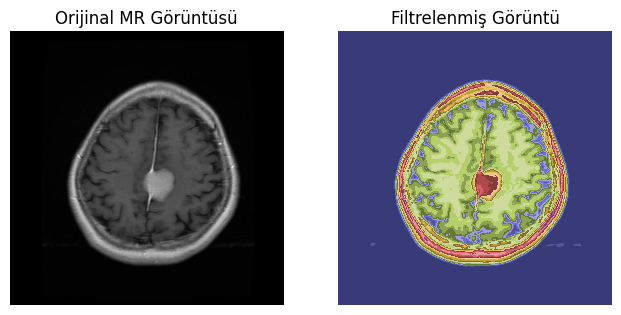

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, morphology

# 1. Görüntüyü yükledik
image_path = r"C:\Users\meteh\AppData\Local\Temp\a3c36a96-d721-4906-91f2-6029d082ba1e_Mr.zip.a1e\brain_tumor_data\test\337.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 2. Gürültüyü azaltmak için Gaussian filtre uyguladık
image_filtered = cv2.GaussianBlur(image, (5, 5), 0)

# 6. Sonuçları gösterdik
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Orijinal MR Görüntüsü')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_filtered, cmap='tab20b')
plt.title('Filtrelenmiş Görüntü')
plt.axis('off')

plt.show()

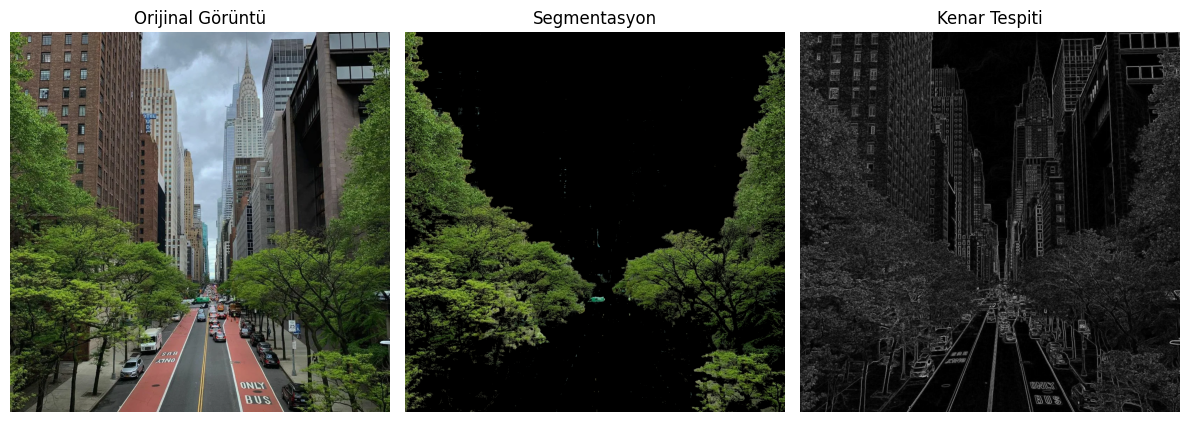

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

# Görüntüyü yükledik
image_path = r"C:\Users\meteh\city.jpg"
image = cv2.imread(image_path)

#BGR'den RGB'ye dönüşüm gerçekleştirdik
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Renk tabanlı segmentasyon işlemlerini yaptık
hsv_image=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
lover_bound=np.array([30,50,50])  # ALT SINIRI BELIRLEDIK
upper_bound=np.array([90,255,255]) # UST SINIRI BELIRLEDIK
mask=cv2.inRange(hsv_image,lover_bound,upper_bound)
segmented_image=cv2.bitwise_and(image_rgb,image_rgb,mask=mask)

#Kenar tespiti
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
edges=filters.sobel(gray_image)

# Sonuçları göster
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Orijinal Görüntü')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Segmentasyon')
plt.imshow(segmented_image)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Kenar Tespiti')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


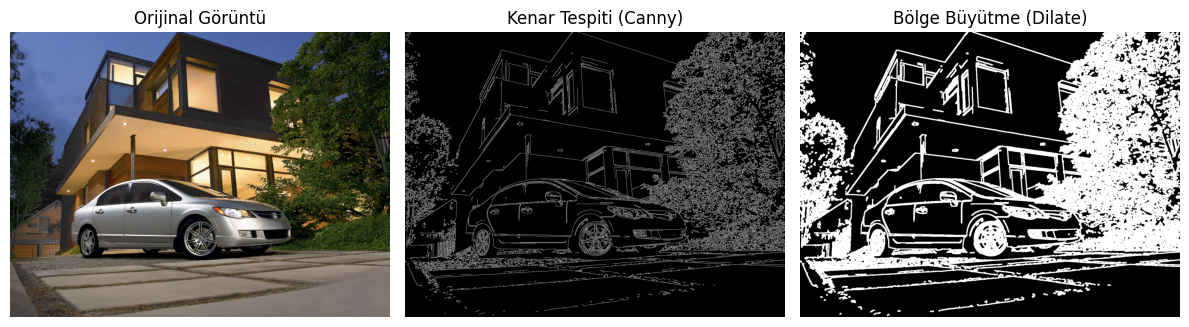

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

# Görüntüyü yükleyin
image_path = r"C:\Users\meteh\masa2.jpg"
image = cv2.imread(image_path)

# BGR'den RGB'ye dönüşüm
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Gri tonlamaya dönüştürdük
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Canny kenar tespiti
edges = cv2.Canny(gray_image, 100, 200)

# Bölge büyütme (dilate işlemi) işlemini gerçekleştirdik
kernel = np.ones((5, 5), np.uint8)
dilated_edges = cv2.dilate(edges, kernel, iterations=1)

# Sonuçları göster
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Orijinal Görüntü')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Kenar Tespiti (Canny)')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Bölge Büyütme (Dilate)')
plt.imshow(dilated_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


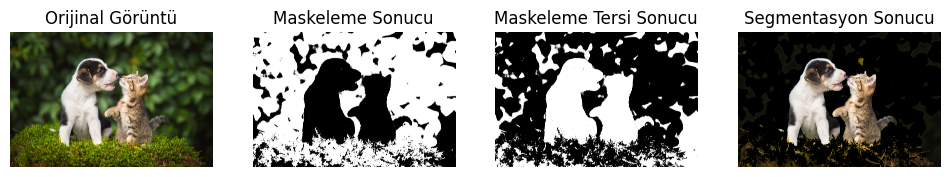

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Görüntüyü yükleme
image_path = r"C:\Users\meteh\kopked.jpg"
image = cv2.imread(image_path)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 2. Renk aralığını belirleme (Yeşillikler için)
lower_green = np.array([30, 30, 30])
upper_green = np.array([80, 255, 255])

# 3. Yeşillik için maske oluşturduk
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# 4. Yeşilliği ters çevirerek kedi ve köpeği diğerlerinden ayırdık
mask_inverse = cv2.bitwise_not(green_mask)
segmented_image = cv2.bitwise_and(image, image, mask=mask_inverse) #yeşil bölge harici kısımları elde ettik

# 5. Sonuçları görselleştirme
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.title('Orijinal Görüntü')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Maskeleme Sonucu')
plt.imshow(cv2.cvtColor(green_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Maskeleme Tersi Sonucu')
plt.imshow(cv2.cvtColor(mask_inverse, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Segmentasyon Sonucu')
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
